# OpenCV (cv2)

- OpenCV читает BGR

- img.shape → (H, W, C)

In [52]:
import matplotlib.pyplot as plt
import numpy as np

import cv2
print(cv2.__version__)

4.13.0


## 1. Загрузка, отображение, сохранение изображений

In [53]:
img = cv2.imread(r"dataset\image_00001.jpg")



cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("out.png", img)

True

## 2. Цветовые пространства

В OpenCV формат HSV = (H, S, V), но с важными особенностями диапазонов.

1. H — Hue (оттенок, цвет)(красный, зелёный, синий и т.д.) H ∈ [0, 179]

* 0 / 179 — красный
* ~30 — жёлтый
* ~60 — зелёный
* ~120 — синий

Важно:
H не имеет смысла, если S ≈ 0 (серый цвет).

2. S — Saturation (насыщенность) Насколько цвет “чистый”. S ∈ [0, 255]

* S = 0 → серый (нет цвета)
* S → 255 → максимально насыщенный цвет

Физический смысл:
* туман, тени → низкая S
* яркие объекты → высокая S

3. V — Value (яркость, интенсивность) Насколько светлый пиксель. V ∈ [0, 255]
* V = 0 → чёрный
* V → 255 → яркий

Text(0.5, 1.0, 'HSV')

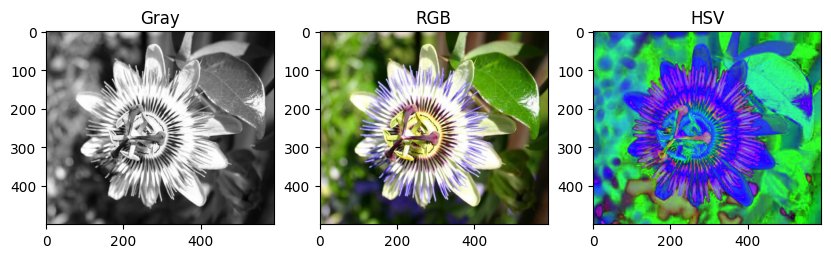

In [54]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv  = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(gray, cmap="gray")
axes[0].set_title("Gray")

axes[1].imshow(rgb)
axes[1].set_title("RGB")

axes[2].imshow(hsv)
axes[2].set_title("HSV")

## 3. Работа с пикселями и ROI

225


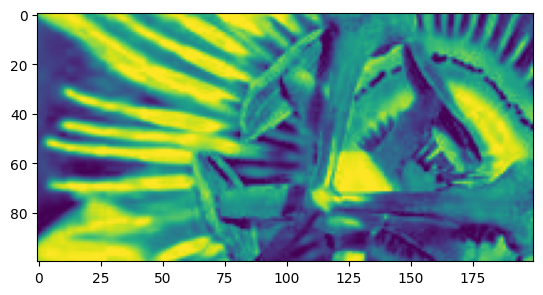

In [66]:
px = rgb[100, 200, 0] 
print(px)       # BGR пиксель
img[100, 200] = [0, 0, 255]

roi = rgb[200:300, 100:300, 2]   # вырезка
plt.imshow(roi)

## 4. Геометрические преобразования

[[-4.92403877e-01 -8.68240888e-02  4.61965166e+02]
 [ 8.68240888e-02 -4.92403877e-01  3.47487863e+02]]


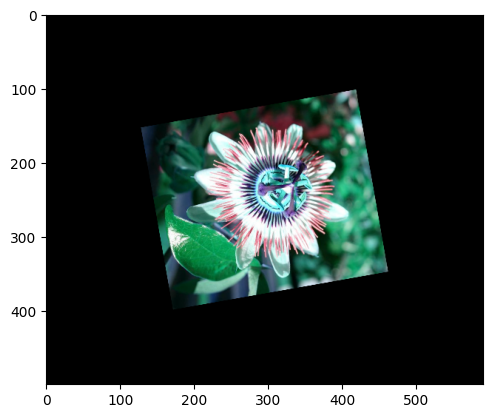

In [72]:
resized = cv2.resize(img, (224, 224))


# Поворот
(h, w) = img.shape[:2]
M = cv2.getRotationMatrix2D((w//2, h//2), 190, 0.5)
print(M)
rotated = cv2.warpAffine(img, M, (w, h))

# Сдвиг
M = np.float32([[1, 0, 50], [0, 1, 30]])
shifted = cv2.warpAffine(img, M, (w, h))

plt.imshow(rotated)


## 5. Фильтрация и размытие

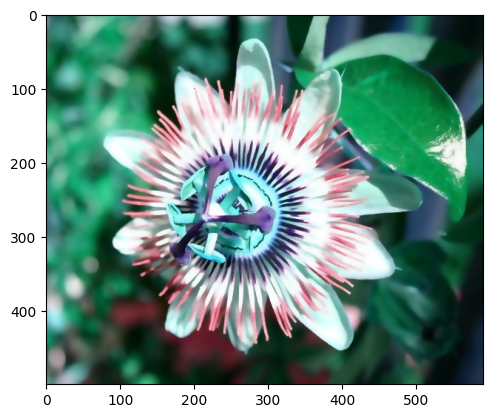

In [ ]:
blur = cv2.GaussianBlur(img, (15,15), 0)
median = cv2.medianBlur(img, 55)
bilateral = cv2.bilateralFilter(img, 9, 75, 75)

plt.imshow(bilateral)

## 6. Градиенты и детекция границ

In [ ]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)

lap = cv2.Laplacian(gray, cv2.CV_64F)

edges = cv2.Canny(gray, 100, 200)

## 7. Пороговая обработка (Thresholding)

In [ ]:
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

th = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 11, 2
)

## 8. Морфологические операции

In [ ]:
kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(thresh, kernel)
dilation = cv2.dilate(thresh, kernel)

opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

## 9. Контуры (ОЧЕНЬ ВАЖНО)

In [ ]:
contours, hierarchy = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

cv2.drawContours(img, contours, -1, (0,255,0), 2)

area = cv2.contourArea(contours[0])

peri = cv2.arcLength(contours[0], True)


10. Bounding box, круги, аппроксимация

In [ ]:
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)

(x,y), r = cv2.minEnclosingCircle(cnt)

epsilon = 0.02 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)

11. Маски и битовые операции

In [ ]:
mask = np.zeros(gray.shape, dtype=np.uint8)
cv2.drawContours(mask, [cnt], -1, 255, -1)

result = cv2.bitwise_and(img, img, mask=mask)

## 12. Работа с видео и камерой

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()

## 13. Детекция объектов (Haar / HOG)

In [ ]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

15. Типовой pipeline (must know)
BGR → Gray
→ Blur
→ Threshold / Canny
→ Morphology
→ Contours
→ Features